In [53]:
import numpy

In [54]:
!head land_global_temperature_annomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [71]:
pyplot.rcdefaults()

In [55]:
T_land = numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv', delimiter=',', skiprows=4)

In [56]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [57]:
numpy.shape(T_land)

(1632, 2)

In [58]:
int(1632/12)

136

In [73]:
from matplotlib import pyplot
%matplotlib inline

In [60]:
T_land[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [61]:
T_land[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

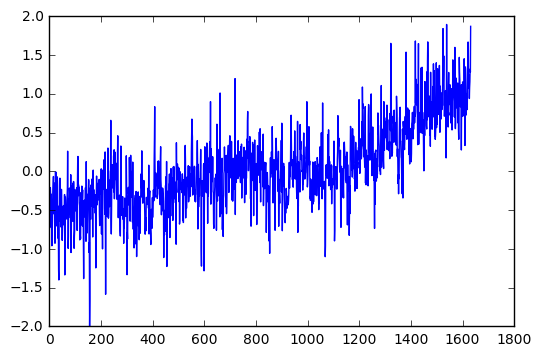

In [74]:
pyplot.plot(T_land[:,1])

In [16]:
#Remember that to remove the ugly line at the beginning of the plot we use a ; at the end of the plot.

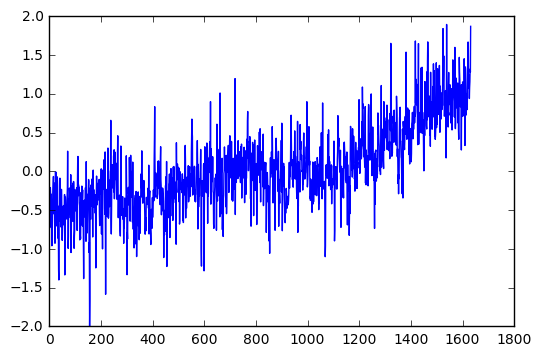

In [35]:
pyplot.plot(T_land[:,1]);

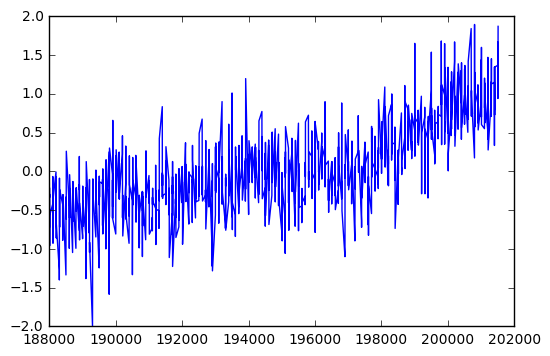

In [36]:
pyplot.plot(T_land[:,0],T_land[:,1]);

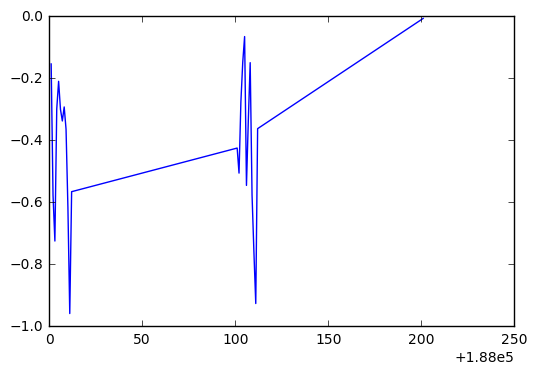

In [75]:
pyplot.plot(T_land[0:25,0],T_land[0:25,1]);

# Using numpy.arrange() for creating our date-array

In [32]:
date = numpy.arange('1880','2016', dtype=('datetime64[M]'))

In [33]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [37]:
len(date)

1632

In [38]:
dummy = numpy.linspace(1,1632, 1632)

In [42]:
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


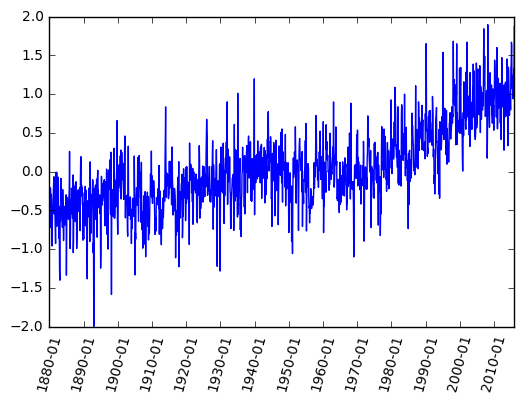

In [76]:
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:,1]);

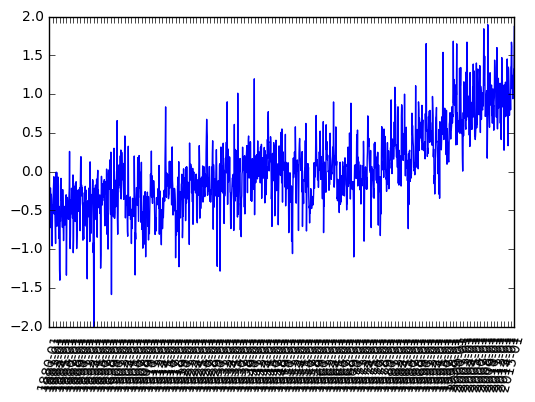

In [48]:
pyplot.xticks(dummy[::12], date[::12], rotation=75)
pyplot.plot(dummy, T_land[:,1]);

In [77]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

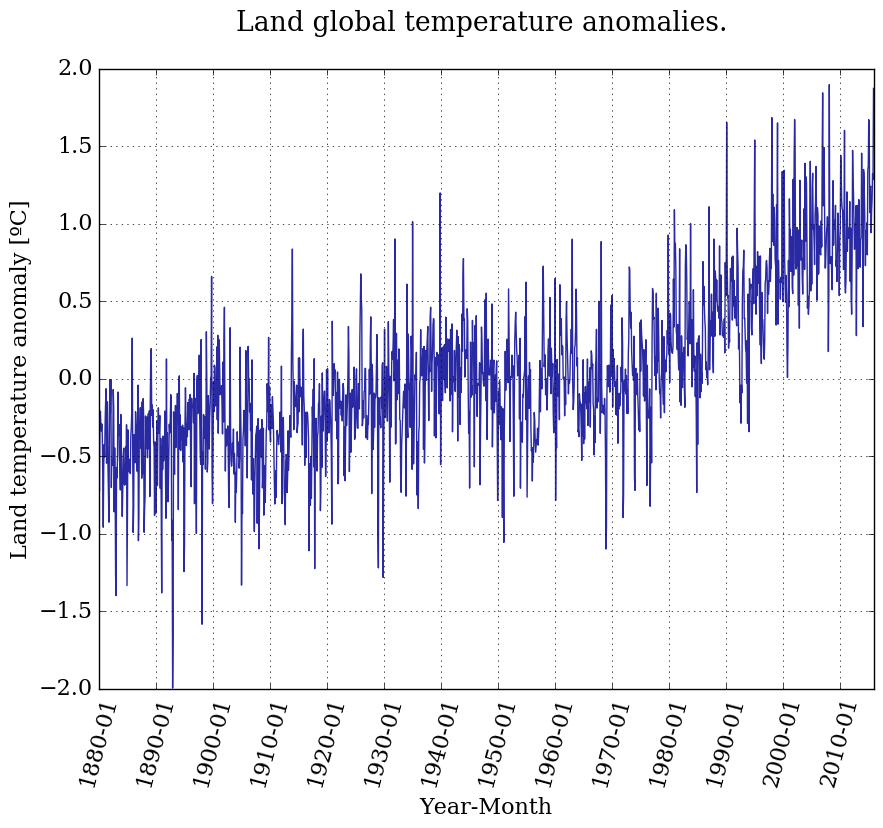

In [83]:
pyplot.figure(figsize=(10,8))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation = 75)
pyplot.plot(dummy, T_land[:,1], color = '#2929a3', linestyle = '-', linewidth = 1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.grid()
pyplot.savefig('temp_anomalies.eps');

## Histograms

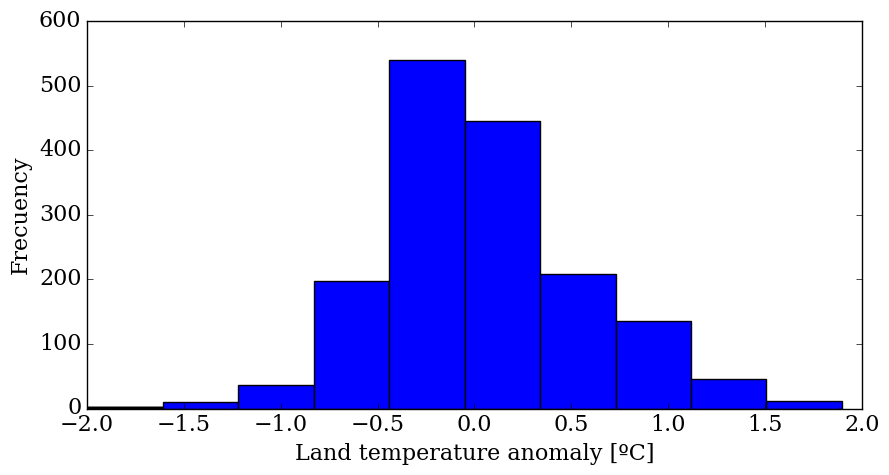

In [84]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Frecuency');

### Normalized Histogram

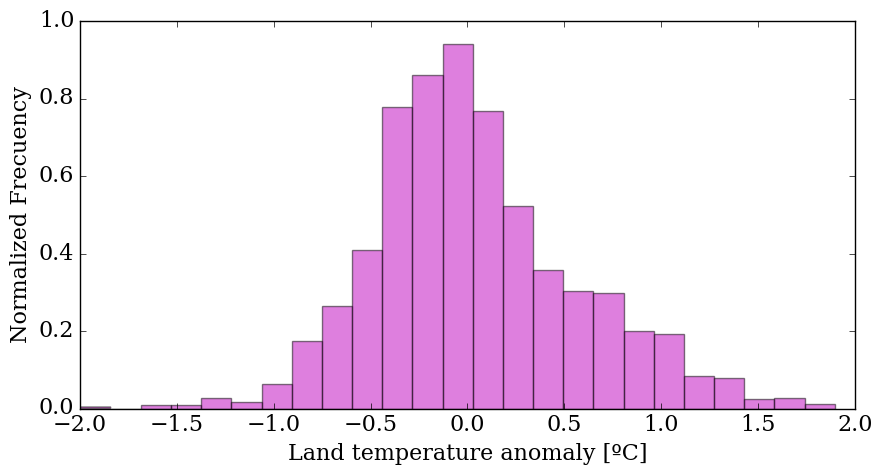

In [86]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=25, normed=True, color='m', alpha = 0.5)
pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Normalized Frecuency');